# p-value distribution using Monte Carlo simulation

Well, in a single sample study p-value is less than the critical level 0.05. Does it necessarily mean that the null hypothesis is incorrect? What about the p-value greater than 0.05?

To figure out what's going on we use Monte Carlo method. It consists in simulating large amount (100 thousand in this illustration) samples from the standard normal distribution, and applying t-test for each sample with (a) corrent null hypothesis, (b), (c) - with incorrect null hypotheses, and plotting a histogram of p-values in each case.

In this notebook we illustrate distribution of pvalue in case of correct and incorrect null hypothesis, and provide brief comments on the topic.

In [1]:
import pandas as pd
import scipy.stats as ss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_trials = 100000
sample_size = 100

# simulate 'n_trials' samples of size 'sample_size' from the standard normal distribution
x = ss.norm.rvs(size=(sample_size, n_trials))

## Null hypothesis is correct

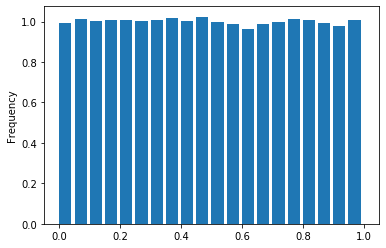

In [3]:
# true mean as null hypothesis
null_hyp_mean = 0.0

# implement t-test for mean value
res = ss.ttest_1samp(x, null_hyp_mean, axis=0)

# extract p-valies for all n_trials simulations
pvalues = res[1]

# plot a histigram of p-values
pd.Series(pvalues).plot.hist(bins=20, width=0.04, density=True);

In [4]:
# probability that p-value is less than 0.5
p_005 = (pvalues < 0.05).mean()
print('probability that p-value is less than 0.05 = {0:.4f}'.format(p_005))

probability that p-value is less than 0.05 = 0.0497


**In case the null hypothesis is correct, the p-value distribution is uniform in $(0, 1)$**.

## Hypothetic mean is greater than the actual one

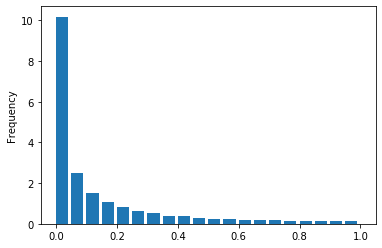

In [5]:
# true mean as null hypothesis
null_hyp_mean = 0.2

# implement t-test for mean value
res = ss.ttest_1samp(x, null_hyp_mean, axis=0)

# extract p-valies for all n_trials simulations
pvalues = res[1]

# plot a histigram of p-values
pd.Series(pvalues).plot.hist(bins=20, width=0.04, density=True);

In [6]:
# probability that p-value is less than 0.5
p_005 = (pvalues < 0.05).mean()
print('probability that p-value is less than 0.05 = {0:.4f}'.format(p_005))

probability that p-value is less than 0.05 = 0.5091


**In this case small p-values are much more likely than large ones**

## Hypothetic mean is smaller than the actual one

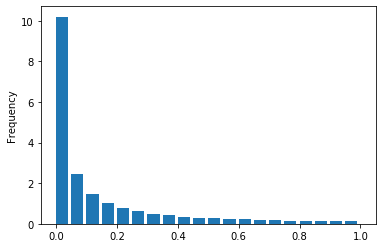

In [7]:
# true mean as null hypothesis
null_hyp_mean = -0.2

# implement t-test for mean value
res = ss.ttest_1samp(x, null_hyp_mean, axis=0)

# extract p-valies for all n_trials simulations
pvalues = res[1]

# plot a histigram of p-values
pd.Series(pvalues).plot.hist(bins=20, width=0.04, density=True);

In [8]:
# probability that p-value is less than 0.5
p_005 = (pvalues < 0.05).mean()
print('probability that p-value is less than 0.05 = {0:.4f}'.format(p_005))

probability that p-value is less than 0.05 = 0.5102


**In this case small p-values are also much more likely than large ones**

## Conclusion

In case the null hypothesis is correct, the p-value has uniform distribution in (0,1). In case the null hypothesis is incorrect, the p-value is much more likely to take small values. However, **in neither case p-value alone allows making definite conclusion on hypothesis correctness**.